## Assignment Statement:

#### Build a model for the prediction of bike rental daily count based on the environmental and seasonal settings.


A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

### Objective:

- Which variables are significant in predicting the demand for shared bikes

- How well those variables describe the bike demand



### Business Goal:

To build a model that will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [244]:
# Importing some important Library which will be used in this Assignment

import pandas as pd  # Pandas Library for working on Data Frame
import numpy as np   # Numpy will be used for Mathematics
import matplotlib.pyplot as plt # Matplotlib is used for Visualiziation
import seaborn as sns # Seaborn toghether with Matplotlib enhance the graphs
import datetime as dt # For Date and Time columns

# Filter Warning Messages
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split  # to split the data
from sklearn.preprocessing import MinMaxScaler # for scaling 
from sklearn.feature_selection import RFE # for calculatinf Recursive Feature Elimination
from sklearn.linear_model import LinearRegression # For building Linear Regression 
from statsmodels.stats.outliers_influence import variance_inflation_factor # For calculatig VIF
import statsmodels.api as sm # stats model library
from sklearn.metrics import r2_score # for calculating model score

In [245]:
df = pd.read_csv('day.csv')  # read csv file

In [246]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [248]:
df.shape

(730, 16)

In [249]:
df.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [250]:
# check for null values and sum it

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [251]:
# checking for duplicate rows
df[df.duplicated()]

# No duplicate rows found in Data Set

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [252]:
# checking rows having all missing values
# sum it up to check how many rows have all missing values

df.isnull().all(axis=1).sum()

# There is no any single row which miss all data points 

0

In [253]:
# checking column which have single value.
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('**********************************************************\n\n')

instant
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 24

Drop columns that are not useful for analysis

- `instant` is just a row instance identifier.

- `dteday` should be removed as we have variables like mnth and year and weekday.

- `casual and registered` As our objective is to find the total count of bikes `cnt` and not by specific category, we will ignore these two columns.

In [254]:
df.drop(['instant' , 'dteday' , 'casual' , 'registered'] , axis=1 , inplace=True)

In [255]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


# Data Visualization

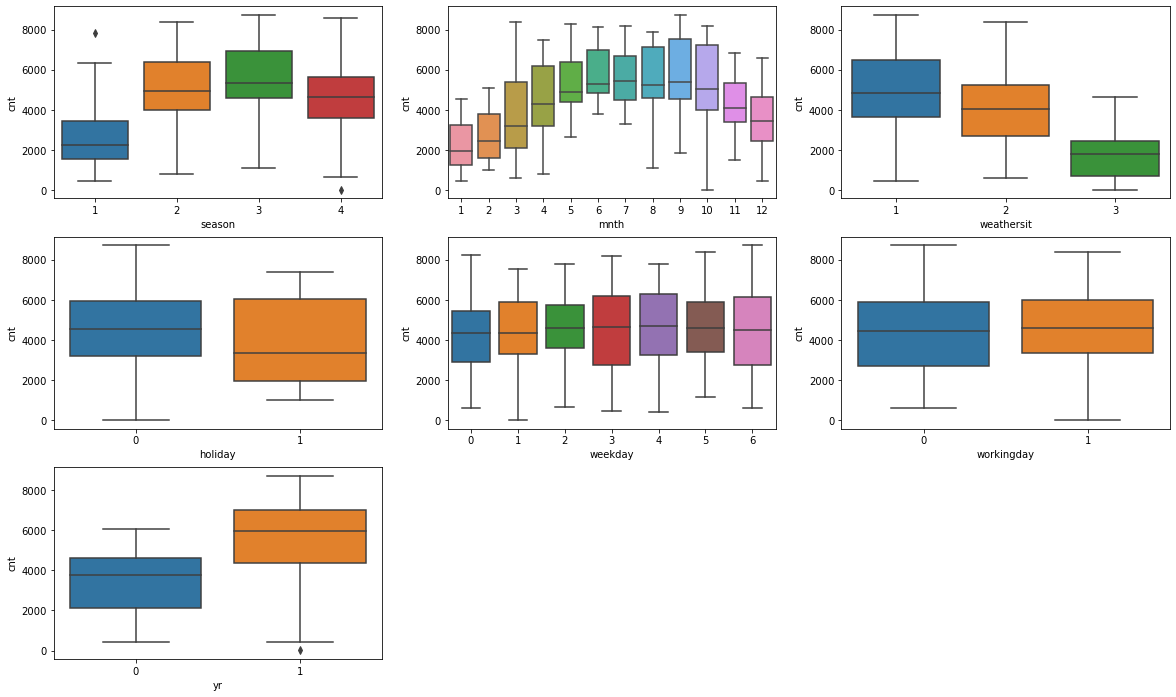

In [257]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

In [258]:
# function to create barplot related to categorical columns

def barplot_visual(var):
    plt.figure(figsize = (16,6))
    
    plt.subplot(1,3,1)
    sns.barplot(var,'cnt',data=df)
    
    plt.subplot(1,3,2)
    sns.barplot(var,'cnt',data=df, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    
    plt.subplot(1,3,3)
    sns.barplot(var,'cnt',data=df, hue='workingday',palette='Set1')
    plt.legend(labels=['Working Day', 'Non Working Day'])
    
    plt.show()

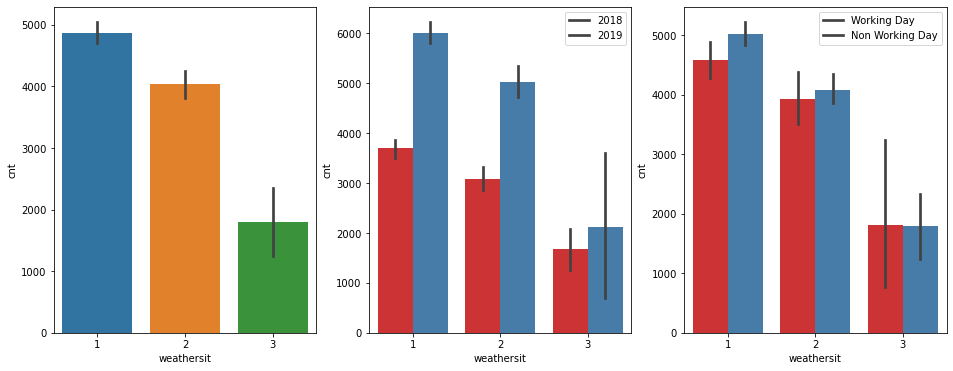

In [259]:
barplot_visual('weathersit')

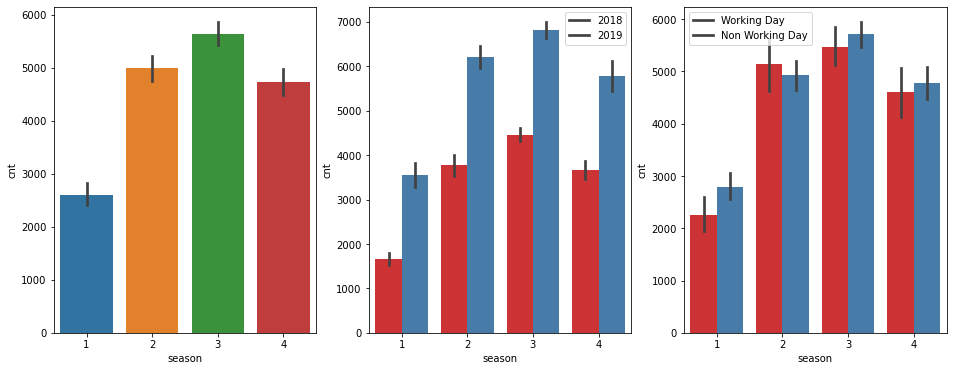

In [260]:
barplot_visual('season')

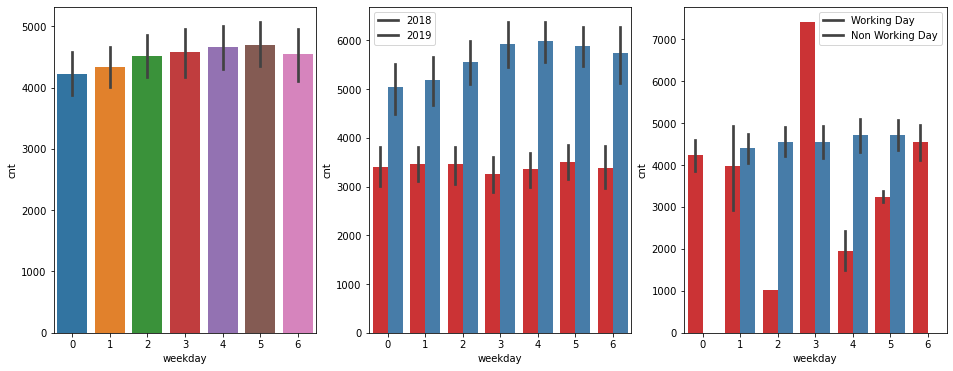

In [261]:
barplot_visual('weekday')

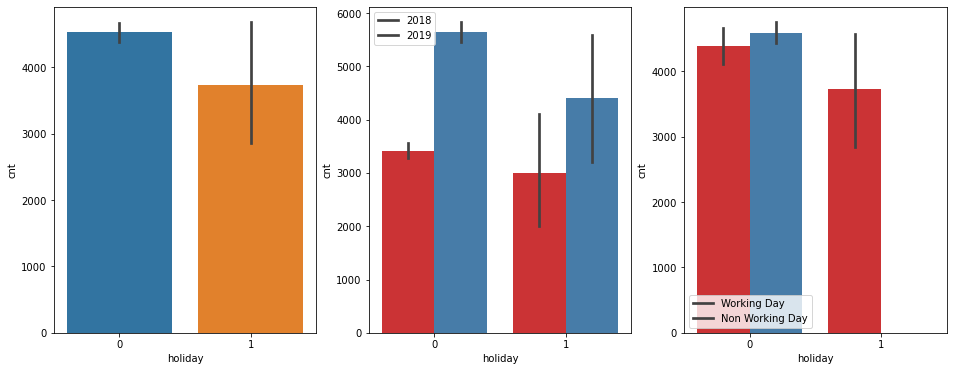

In [262]:
barplot_visual('holiday')

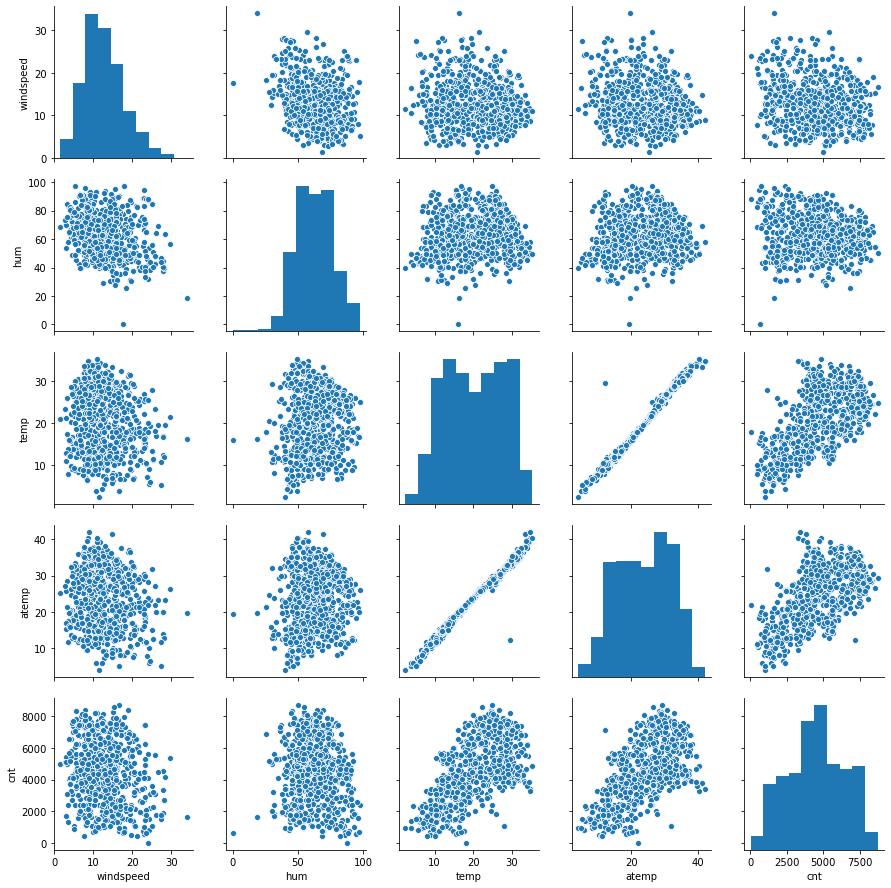

In [263]:
# visualizing the numerical columns by pairplot

sns.pairplot(data=df,vars=['windspeed' ,'hum' ,'temp','atemp','cnt'])
plt.show()

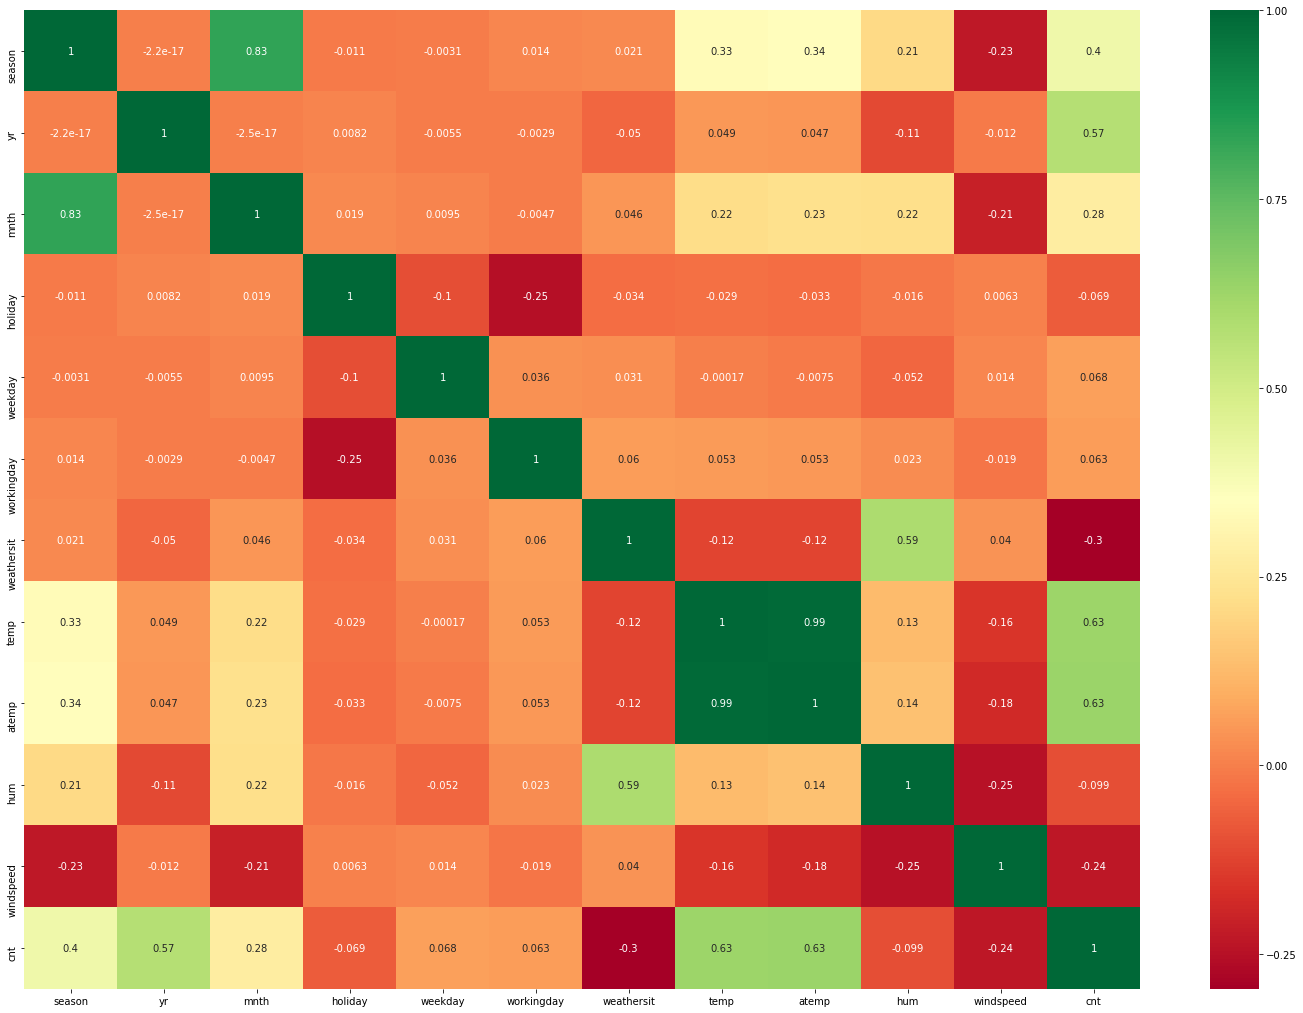

In [264]:
# correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25,18))
sns.heatmap(df.corr(), annot = True, cmap="RdYlGn")
plt.show()

# Data Preparation

In [265]:
# Convert the necessary variables into categorical variable

df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')


In [266]:
# Create Dummy Variable

df = pd.get_dummies(df, drop_first=True) 

# drop_first = True drop the orignal variable for which the dummy variables created


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr              730 non-null int64
holiday         730 non-null int64
workingday      730 non-null int64
temp            730 non-null float64
atemp           730 non-null float64
hum             730 non-null float64
windspeed       730 non-null float64
cnt             730 non-null int64
season_2        730 non-null uint8
season_3        730 non-null uint8
season_4        730 non-null uint8
mnth_2          730 non-null uint8
mnth_3          730 non-null uint8
mnth_4          730 non-null uint8
mnth_5          730 non-null uint8
mnth_6          730 non-null uint8
mnth_7          730 non-null uint8
mnth_8          730 non-null uint8
mnth_9          730 non-null uint8
mnth_10         730 non-null uint8
mnth_11         730 non-null uint8
mnth_12         730 non-null uint8
weekday_1       730 non-null uint8
weekday_2       730 non-null uint8
weekday_3       730 non-null uint8
weekday_4   

In [268]:
df_bike = df.copy() # checkpoint

In [269]:
# Perform Train-Test Split

from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(df_bike, train_size = 0.70, random_state = 0)

In [270]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
524,1,0,0,29.144153,32.41835,43.7083,9.667229,7498,1,0,...,0,0,0,0,0,0,0,1,0,0
12,0,0,1,6.765000,7.54415,47.0417,20.167000,1406,0,0,...,0,0,0,0,0,1,0,0,0,0
161,0,0,0,29.725000,33.90190,65.4583,10.374950,4966,1,0,...,0,0,0,0,0,0,0,1,0,0
556,1,0,1,29.383347,32.51355,63.3333,10.166111,7264,0,1,...,0,0,0,0,1,0,0,0,0,0
502,1,0,1,23.130847,27.55605,52.3333,9.166739,7639,1,0,...,0,0,0,0,0,0,1,0,0,0


In [271]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 524 to 684
Data columns (total 30 columns):
yr              510 non-null int64
holiday         510 non-null int64
workingday      510 non-null int64
temp            510 non-null float64
atemp           510 non-null float64
hum             510 non-null float64
windspeed       510 non-null float64
cnt             510 non-null int64
season_2        510 non-null uint8
season_3        510 non-null uint8
season_4        510 non-null uint8
mnth_2          510 non-null uint8
mnth_3          510 non-null uint8
mnth_4          510 non-null uint8
mnth_5          510 non-null uint8
mnth_6          510 non-null uint8
mnth_7          510 non-null uint8
mnth_8          510 non-null uint8
mnth_9          510 non-null uint8
mnth_10         510 non-null uint8
mnth_11         510 non-null uint8
mnth_12         510 non-null uint8
weekday_1       510 non-null uint8
weekday_2       510 non-null uint8
weekday_3       510 non-null uint8
weekday_4 

# Rescaling the features

In [272]:
# Using MinMaxScaler to Rescaling the numerical variables

scaler = MinMaxScaler()

In [273]:
# Applying scaler() to all the numeric columns 
# All other dummy variables are already in two state i.e. 1 and 0

num_var = ['temp','atemp','hum','windspeed','cnt']
df_train[num_var] = scaler.fit_transform(df_train[num_var])

In [274]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
524,1,0,0,0.802869,0.755332,0.254640,0.255430,0.860101,1,0,...,0,0,0,0,0,0,0,1,0,0
12,0,0,1,0.089497,0.071535,0.301044,0.647940,0.159227,0,0,...,0,0,0,0,0,1,0,0,0,0
161,0,0,0,0.821384,0.796115,0.557424,0.281887,0.568799,1,0,...,0,0,0,0,0,0,0,1,0,0
556,1,0,1,0.810494,0.757949,0.527842,0.274080,0.833180,0,1,...,0,0,0,0,1,0,0,0,0,0
502,1,0,1,0.611185,0.621666,0.374709,0.236721,0.876323,1,0,...,0,0,0,0,0,0,1,0,0,0


# EDA

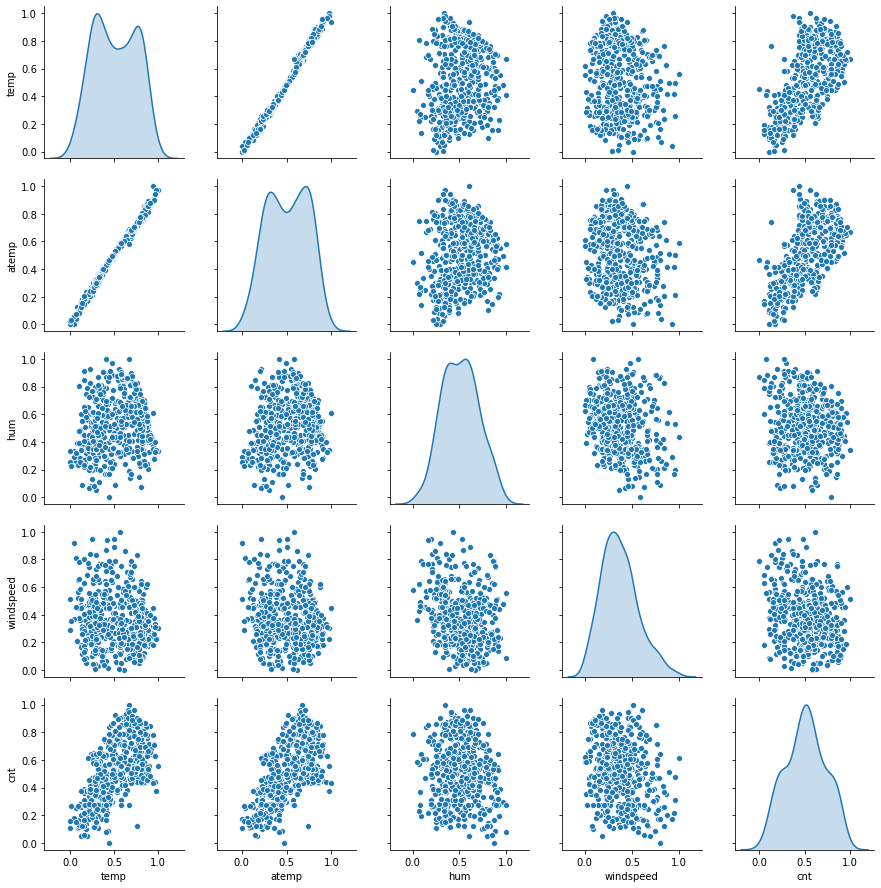

In [275]:
# pair plot for numeric variables


num_var = df_train[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(num_var, diag_kind='kde')
plt.show()

In [276]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

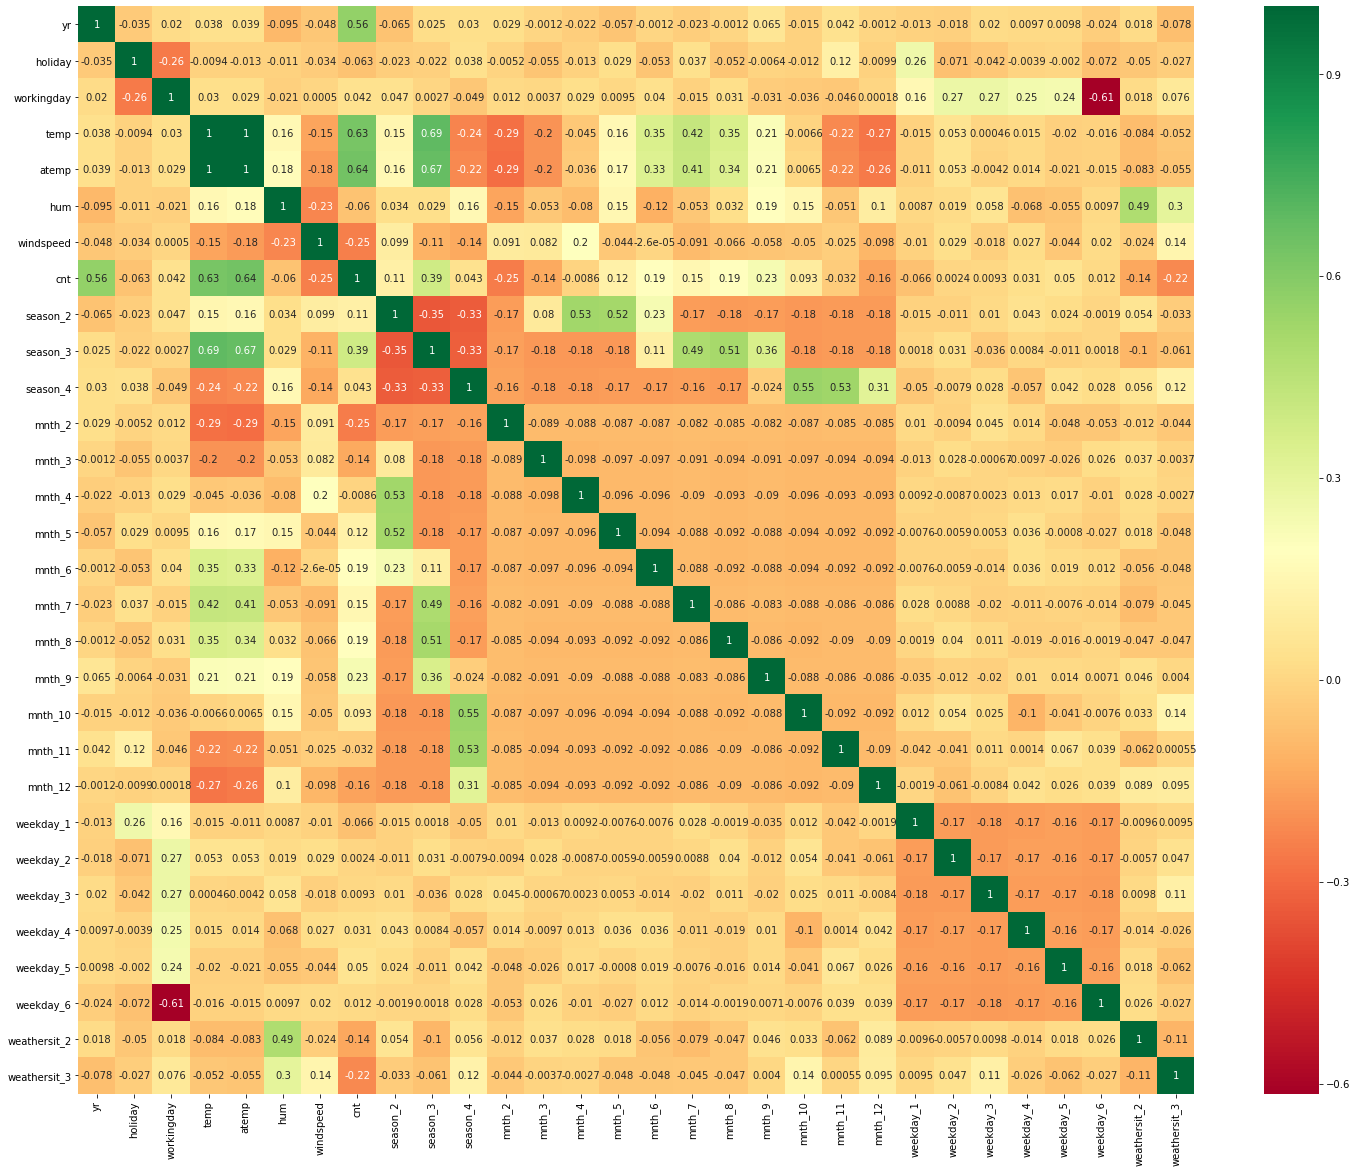

In [277]:
# Check corelation with the heatmap for df_train

plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()



The above heatmap is showing the colinearity between the variables. It will help to select the variables as per their VIF and P-Value

## Bilding a Model

In [278]:
y_train = df_train.pop('cnt')
X_train = df_train

In [279]:
# Importing LinearRegression and RFE  

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [280]:
# We will chose an arbitrary number 15 for RFE.
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # calcularing RFE
rfe = rfe.fit(X_train, y_train)

In [281]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  # zipping column names with their ranking and support

[('yr', True, 1),
 ('holiday', False, 6),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', True, 1),
 ('mnth_4', True, 1),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 7),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 11),
 ('mnth_12', False, 15),
 ('weekday_1', False, 13),
 ('weekday_2', False, 14),
 ('weekday_3', False, 10),
 ('weekday_4', False, 9),
 ('weekday_5', False, 8),
 ('weekday_6', False, 4),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1)]

In [282]:
rfe_col = X_train.columns[rfe.support_] # selecting RFE supports variable
rfe_col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_3'],
      dtype='object')

In [283]:
# RFE selected variables

X_train_rfe = X_train[rfe_col]

# Linear Model using `STATS MODEL`

## Calculating VIF  

In [284]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Potential_Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Potential_Features,VIF
2,atemp,1055.63
1,temp,1031.10
6,season_3,8.39
3,hum,8.08
5,season_2,6.47
4,windspeed,3.54
7,season_4,3.01
9,mnth_4,2.51
10,mnth_5,2.29
0,yr,1.98


## Model 1

In [285]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first Linear model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [286]:
# Check the summary 
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     153.5
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          6.15e-175
Time:                        19:46:26   Log-Likelihood:                 497.89
No. Observations:                 510   AIC:                            -963.8
Df Residuals:                     494   BIC:                            -896.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2121      0.022      9.636   

#### Removing the variable 'atemp' based on its high VIF & high p-value and than building Model 2


## Model 2

In [287]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

### Calculating VIF

In [288]:
# Again Check for the VIF values of the feature variables by creating similar dataframe as above


vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,18.64
5,season_3,8.32
2,hum,6.99
4,season_2,6.42
3,windspeed,3.48
6,season_4,2.93
8,mnth_4,2.40
9,mnth_5,2.28
0,yr,1.97
10,mnth_8,1.68


In [289]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [290]:
# Check summary for lr2
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     162.6
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          7.31e-175
Time:                        19:46:26   Log-Likelihood:                 495.05
No. Observations:                 510   AIC:                            -960.1
Df Residuals:                     495   BIC:                            -896.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2300      0.021     11.081   

#### Based on domain knowldge, temprature is an important factor for renting bike so we will remove seson_3 variable and keep temp and see the VIF values and build Model 3

## Model 3

In [291]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

### Calculating VIF

In [292]:
# Check for the VIF values of the feature variables by creating similar dataframe


vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,6.84
1,temp,6.69
4,season_2,4.31
3,windspeed,3.43
7,mnth_4,2.37
5,season_4,2.27
8,mnth_5,2.27
0,yr,1.94
11,mnth_10,1.63
9,mnth_8,1.49


In [293]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [294]:
# Check summary for lr3
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     171.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          9.25e-174
Time:                        19:46:27   Log-Likelihood:                 489.74
No. Observations:                 510   AIC:                            -951.5
Df Residuals:                     496   BIC:                            -892.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2242      0.021     10.740   

#### Remove humidity variable as it have VIF > 5 and build Model 4

## Model 4

In [295]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### Calculating VIF

In [296]:
# Check for the VIF values of the feature variables by creating similar dataframe


vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.77
3,season_2,4.31
2,windspeed,3.25
6,mnth_4,2.36
7,mnth_5,2.21
0,yr,1.93
4,season_4,1.93
10,mnth_10,1.63
8,mnth_8,1.49
5,mnth_3,1.31


In [297]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [298]:
# Check summary for lr4
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     153.1
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          3.13e-158
Time:                        19:46:27   Log-Likelihood:                 450.15
No. Observations:                 510   AIC:                            -874.3
Df Residuals:                     497   BIC:                            -819.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1072      0.018      6.027   

#### Now removing the variables based on high P-values
#### Initially we have high P-values for mnth_4 , mnth_5, mnth_10 ,mnth_8 we will remove one by one 

## Model 5

In [299]:
# removing mnth_4 based on high p-value

X_train_new = X_train_new.drop(["mnth_4"], axis = 1)

### Calculate VIF

In [300]:
# Check for the VIF values of the feature variables by creating similar dataframe


vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.64
2,windspeed,3.09
3,season_2,2.30
0,yr,1.93
4,season_4,1.92
9,mnth_10,1.63
6,mnth_5,1.57
7,mnth_8,1.49
8,mnth_9,1.30
5,mnth_3,1.17


In [301]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [302]:
# Check summary for lr5
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     165.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.32e-158
Time:                        19:46:27   Log-Likelihood:                 448.38
No. Observations:                 510   AIC:                            -872.8
Df Residuals:                     498   BIC:                            -821.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1100      0.018      6.192   

## Model 6

In [303]:
# remove mnth_5 based on its high p-value


X_train_new = X_train_new.drop(["mnth_5"], axis = 1)

### Calculate VIF

In [304]:
# Check for the VIF values of the feature variables by creating similar dataframe


vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.56
2,windspeed,3.06
0,yr,1.93
4,season_4,1.92
3,season_2,1.82
8,mnth_10,1.63
6,mnth_8,1.48
7,mnth_9,1.30
5,mnth_3,1.15
9,weathersit_3,1.08


In [305]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [306]:
# Check summary for lr6
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     182.3
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.64e-159
Time:                        19:46:27   Log-Likelihood:                 447.82
No. Observations:                 510   AIC:                            -873.6
Df Residuals:                     499   BIC:                            -827.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1108      0.018      6.240   

## Model 7

In [307]:
# remove mnth_3 based on its high p-value


X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

### Calculate VIF

In [308]:
# Check for the VIF values of the feature variables by creating similar dataframe


vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.55
2,windspeed,2.92
0,yr,1.91
4,season_4,1.90
3,season_2,1.81
7,mnth_10,1.63
5,mnth_8,1.48
6,mnth_9,1.30
8,weathersit_3,1.08


In [309]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_new)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [310]:
# Check summary for lr7

print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     201.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          3.30e-160
Time:                        19:46:27   Log-Likelihood:                 446.71
No. Observations:                 510   AIC:                            -873.4
Df Residuals:                     500   BIC:                            -831.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1173      0.017      6.808   

## Model 8

In [311]:
# remove mnth_10 based on its high p-value


X_train_new = X_train_new.drop(["mnth_10"], axis = 1)

### Calculate VIF

In [312]:
# Check for the VIF values of the feature variables by creating similar dataframe


vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.42
2,windspeed,2.91
0,yr,1.90
3,season_2,1.80
5,mnth_8,1.47
4,season_4,1.41
6,mnth_9,1.27
7,weathersit_3,1.07


In [313]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_new)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [314]:
# Check summary for lr8

print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     224.8
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          2.15e-160
Time:                        19:46:27   Log-Likelihood:                 444.34
No. Observations:                 510   AIC:                            -870.7
Df Residuals:                     501   BIC:                            -832.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1126      0.017      6.565   

## Model 9

In [315]:
# remove mnth_8 based on its high p-value


X_train_new = X_train_new.drop(["mnth_8"], axis = 1)

In [316]:
# Add a constant
X_train_lm9 = sm.add_constant(X_train_new)

# Create a first fitted model
lr9 = sm.OLS(y_train, X_train_lm9).fit()

In [317]:
# Check summary for lr9

print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     254.2
Date:                Wed, 16 Feb 2022   Prob (F-statistic):          1.50e-160
Time:                        19:46:27   Log-Likelihood:                 441.85
No. Observations:                 510   AIC:                            -867.7
Df Residuals:                     502   BIC:                            -833.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1109      0.017      6.446   

#### Model 9 showing the p values and F statistic in range so we can consider this model to test our train data

#### F-Statistics value of 254.2 (which is greater than 1) and the p-value of 1.50e-160 (almost equals to zero) states that the overall model is significant

In [318]:
# Checking the parameters for lr9

lr9.params

const           0.110874
yr              0.224977
temp            0.538949
windspeed      -0.095072
season_2        0.075575
season_4        0.117280
mnth_9          0.081346
weathersit_3   -0.231336
dtype: float64

## Linear Assumptions for lr9 model

In [319]:
X_train_lm9

,const,yr,temp,windspeed,season_2,season_4,mnth_9,weathersit_3
524,1.0,1,0.802869,0.255430,1,0,0,0
12,1.0,0,0.089497,0.647940,0,0,0,0
161,1.0,0,0.821384,0.281887,1,0,0,0
556,1.0,1,0.810494,0.274080,0,0,0,0
502,1.0,1,0.611185,0.236721,1,0,0,0
...,...,...,...,...,...,...,...,...
707,1.0,1,0.375936,0.289714,0,1,0,0
192,1.0,0,0.911781,0.395608,0,0,0,0
629,1.0,1,0.723364,0.604317,0,0,1,0
559,1.0,1,0.793067,0.253907,0,0,0,0


### Error Terms Normality 

Text(0.5, 0, 'Errors')

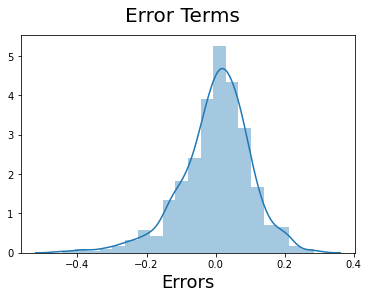

In [320]:
y_train_pred = lr9.predict(X_train_lm9) # predict the train data to check the normality of error terms


# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

 - Error terms followng Normal Distribution

### Multi-Colinearity

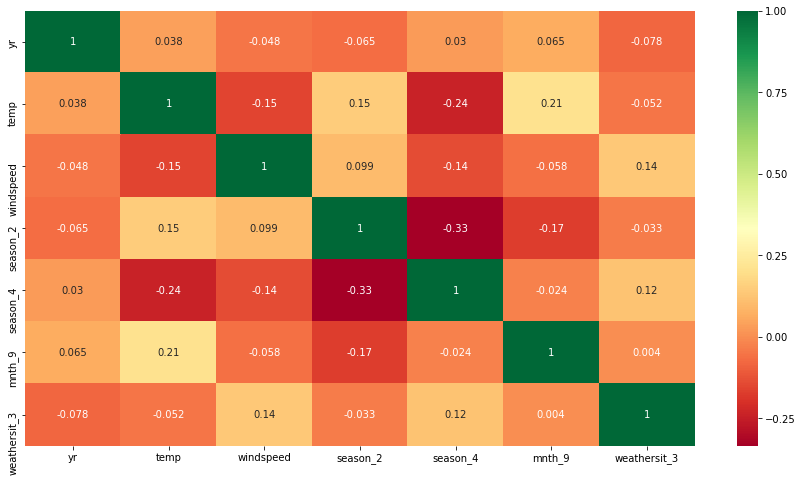

In [321]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

- There is no Multi-Colinearity between the variables

### Linearity

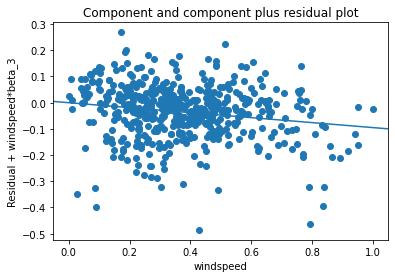

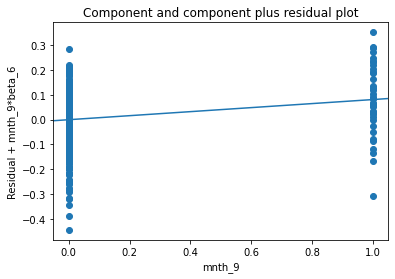

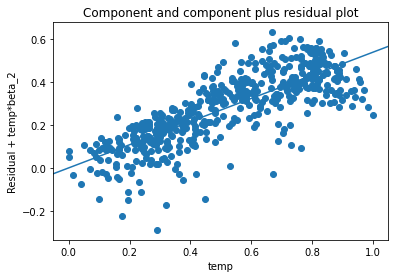

In [322]:

# Checking Linear relationship using CCPR plot

# CCPR plot provides a way to judge the effect of one regressor on the response variable by taking into account the 
# effects of the other independent variables.

sm.graphics.plot_ccpr(lr9, 'windspeed')
plt.show()

sm.graphics.plot_ccpr(lr9, 'mnth_9')
plt.show()

sm.graphics.plot_ccpr(lr9, 'temp')
plt.show()

- Linearity can be observed from above visualizations

### Homoscedasticity 

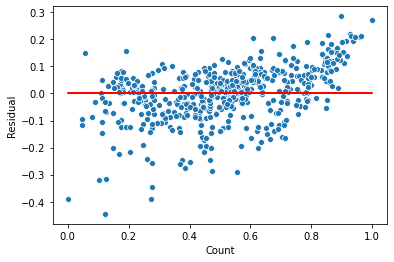

In [323]:
# cheking random variables have the same finite variance

y_train_pred = lr9.predict(X_train_lm9)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- No visible pattern observed from above plot for residuals.

## Making Predictions Using the Final Model

Model 9 is following the linear assumption rule and is ready to test on test data set

In [324]:
# Applying scalling to test data

num_var = ['temp','atemp','hum','windspeed','cnt']
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
196,0,0,0,0.771285,0.741444,0.460557,0.415865,0.678900,0,1,...,0,0,0,0,0,0,0,1,0,0
187,0,0,1,0.854058,0.808256,0.552784,0.292782,0.525771,0,1,...,0,0,0,0,0,1,0,0,0,0
14,0,0,0,0.178804,0.205177,0.340487,0.289684,0.141049,0,0,...,0,0,0,0,0,0,0,1,1,0
31,0,0,1,0.125012,0.186509,0.801018,0.027323,0.153935,0,0,...,0,0,0,1,0,0,0,0,1,0
390,1,0,1,0.320391,0.353539,0.717517,0.077873,0.466291,0,0,...,0,0,0,0,0,1,0,0,1,0


In [325]:
# Seperating x_test and y_test data set 

y_test = df_test.pop('cnt')
X_test = df_test


In [326]:
# Selecting only same columns as in train dataset

col1 = X_train_new.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm9 = sm.add_constant(X_test)

In [327]:
# making predictions 

y_pred = lr9.predict(X_test_lm9)

In [328]:
rscore = r2_score(y_test, y_pred)
round(rscore,2)

0.81

## Model Evaluation

Ploting graph for Actual versus Predicted values

Text(0, 0.5, 'y_pred')

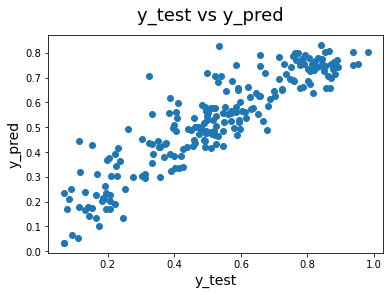

In [329]:
# Plotting y_test and y_pred to see the spread of data

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 18) 
plt.xlabel('y_test', fontsize = 14)
plt.ylabel('y_pred', fontsize = 14) 

### Linear Equation of Best fit line

In [330]:
round(lr9.params , 4)

const           0.1109
yr              0.2250
temp            0.5389
windspeed      -0.0951
season_2        0.0756
season_4        0.1173
mnth_9          0.0813
weathersit_3   -0.2313
dtype: float64

####  𝑐𝑛𝑡 = 0.1109 + 0.2250 x `yr` + 0.5389 x `temp` - 0.0951 x `windspeed` + 0.0756 x `season_2` + 0.1173 x `season_4` + 0.0813 x `mnth_9` - 0.2313 x `weathersit_3` 

## Adjusted r-square



In [331]:
# Calculating Adjusted-R^2 value for the test dataset

adj_r2 = round(1-(1-rscore)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adj_r2)

0.8047


### Visualizing Test Data Set

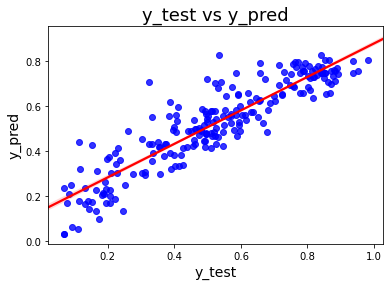

In [332]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=18)
plt.xlabel('y_test', fontsize=14)
plt.ylabel('y_pred', fontsize=14)
plt.show()

### Comparing Training & Test Data Score

    - Train dataset R^2          : 0.780          - Test dataset R^2           : 0.81
    
    
    - Train dataset Adjusted R^2 : 0.777          - Test dataset Adjusted R^2  : 0.805
   

### Conclusion:

Demand of bikes depend on the following factors or variables

- Year
- Temperature
- Windspeed
- seasons Summer & Winter
- Month of September
- In light weather condition